In [1]:
import os
path_parent = os.path.dirname(os.getcwd())
os.chdir(path_parent)

In [2]:
from graphmodels.graphmodel import GraphModel, converte_to_format

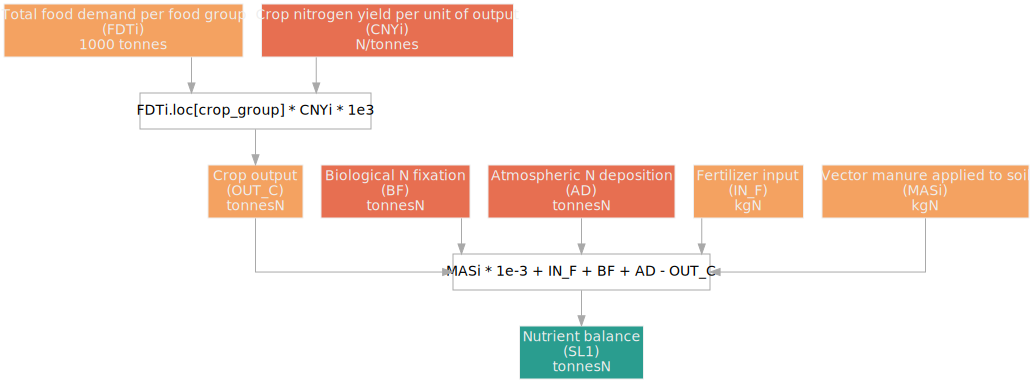

In [3]:

SL1_nodes = {'FDTi': {'type': 'variable',
                      'unit': '1000 tonnes',
                      'name': 'Total food demand per food group'
                      },
             'CNYi': {'type': 'input',
                      'unit': 'N/tonnes',
                      'name': 'Crop nitrogen yield per unit of output'
                      },
             'OUT_C': {'type': 'variable',
                       'unit': 'tonnesN',
                       'name': 'Crop output',
                       'computation': lambda FDTi, CNYi, **kwargs: FDTi.loc[crop_group] * CNYi * 1e3
                       },
             'BF': {'type': 'input', 'unit': 'tonnesN', 'name': 'Biological N fixation'
                    },
             'AD': {'type': 'input', 'unit': 'tonnesN', 'name': 'Atmospheric N deposition'},
             'IN_F': {'type': 'variable', 'unit': 'kgN', 'name': 'Fertilizer input'},
             'MASi': {'type': 'variable',
                      'unit': 'kgN',
                      'name': 'Vector manure applied to soil'},
             'SL1': {'type': 'output',
                     'unit': 'tonnesN',
                     'name': 'Nutrient balance',
                     'computation': lambda MASi, IN_F, BF, AD, OUT_C, **kwargs: MASi * 1e-3 + IN_F + BF + AD - OUT_C
                     }
             }
GraphModel(SL1_nodes).draw()

In [4]:
m3_to_tonnes = 1 # to check
BE3_nodes = {'NFI': {'type': 'input',
                     'unit': 'm3/ha',
                     'name': 'Net natural forest increment rate'},
             'CSF': {'type': 'parameter',
                     'unit': 'm3/ha',
                     'name': 'Climate smart forestry practices'},
             'FBI': {'type': 'variable',
                     'unit': 'm3/ha',
                     'name': 'Forest biomass increment',
                     'computation': lambda CSF, NFI, **kwargs: CSF + NFI
                    },
             'HR': {'type': 'input', 'unit': '%', 'name': 'Harvest rate'},
             'BE3': {'type': 'variable',
                      'unit': 'tonnes/ha',
                      'name': 'net change forest biomass',
                      'computation': lambda FBI, HR, **kwargs: FBI * (1 - HR * 1e-2) * m3_to_tonnes
                     },
            }


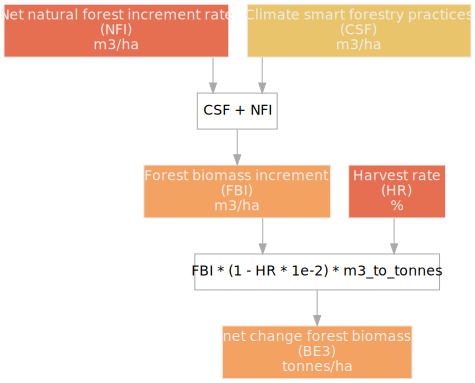

In [5]:
GraphModel(BE3_nodes).draw()